# Build a Python Application to Rank and Classify Smartphone Features.

In [1]:
#importing necessary libraries

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading train dataset
data=pd.read_csv('MobileTrain.csv')
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [3]:
data.tail(3) # to check whether dataset is loaded properly

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[3 rows x 21 columns]

In [4]:
#loading test dataset
test=pd.read_csv('MobileTest.csv')
test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [7]:
#checking the size of the dataset
print("The size of train dataset: " , data.shape)
print("The size of test dataset: " , test.shape)

The size of train dataset:  (2000, 21)
The size of test dataset:  (1000, 21)


it can be seen that train dataset contains 2000 row and 21 columns and test data contains 1000 rows and 21 columns

In [8]:
print("The columns of train dataset are : " ,data.columns)

print("\n The columns of test dataset are : " ,test.columns)

The columns of train dataset are :  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

 The columns of test dataset are :  Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


 The test data doesnt contain the target column 'price_range',where as train data contains it so its a supervised learning method.The additional column that test data contains is the id column, which we can remove.

In [9]:
data.dtypes #checking data types

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

No categorical columns present, so encoding is not needed.

In [10]:
data.info() #checking basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
data.describe() #The basic description of the dataset 

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

It gives us information about the count, mean , standard deviation, minimum and
maximum values and the three quartile values of all the columns present in the dataset.Here Standard Deviation for 'ram','px_height','px_width','battery_power' are having high value compared to rest of the features.So its good to apply scaling to the dataset.

In [12]:
#checking for null valuues

print("The null values contained in the train dataset is : \n")
print(data.isnull().sum())
print("\n The null values contained in the test dataset is : \n")
print(test.isnull().sum())

The null values contained in the train dataset is : 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

 The null values contained in the test dataset is : 

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


there is no null values present in both dataset.

In [13]:
data.duplicated().sum() #checking for duplicates

0

In [14]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Exploratory Data Analysis

1. Univariant Analysis

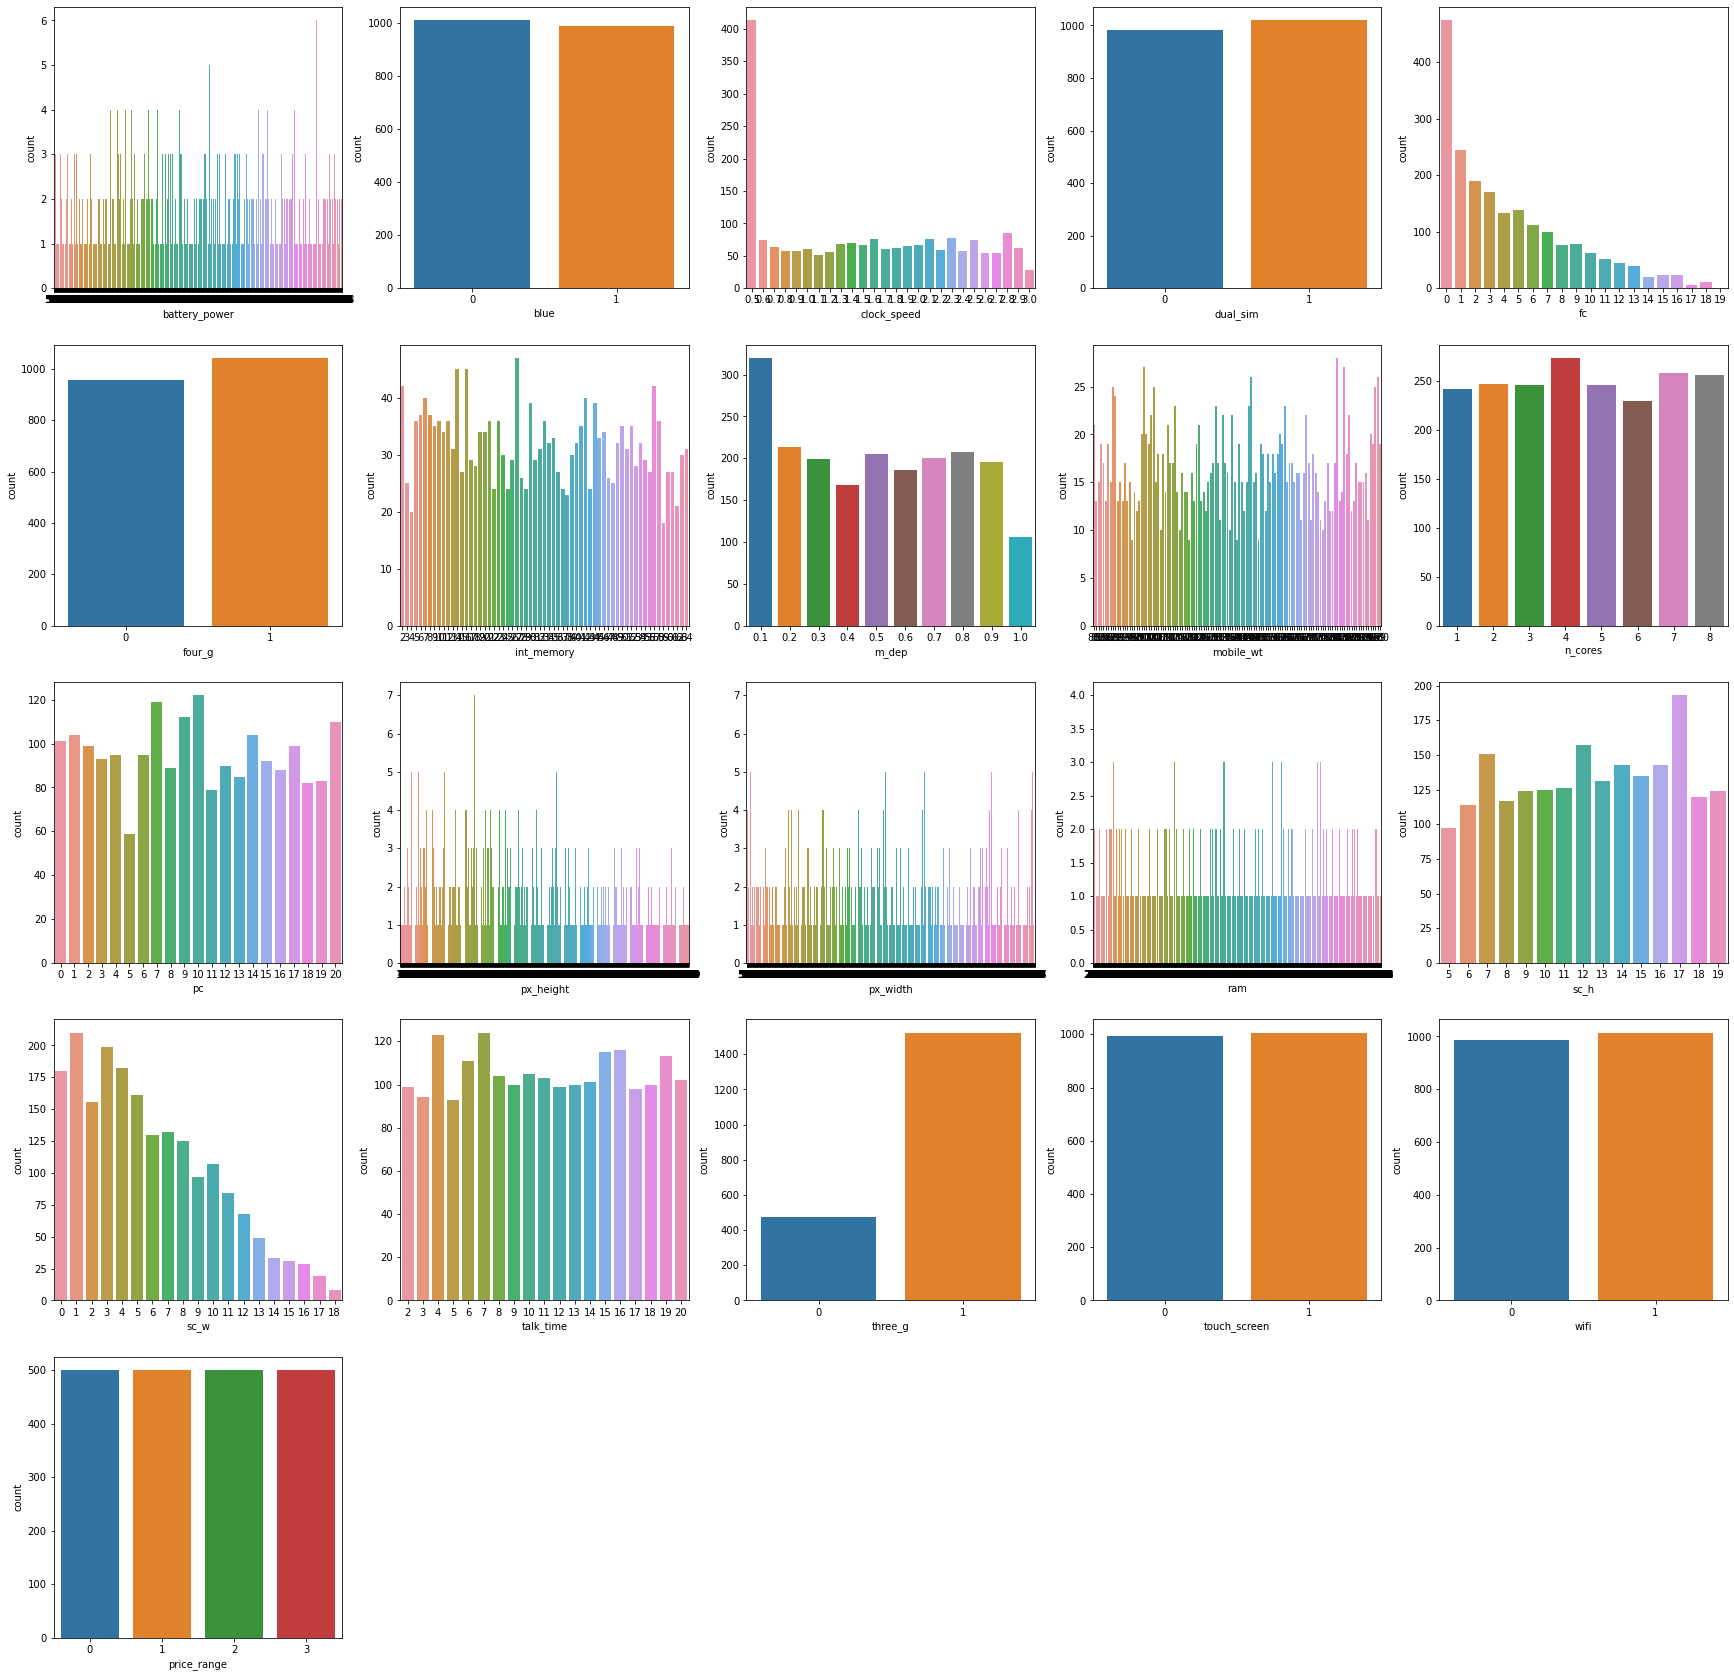

In [17]:
#countplot
column_name=data.columns
len_c=len(column_name)
j=1
plt.figure(figsize=(30,30))
for i in range(0,len_c):
  plt.subplot(5,5,j)
  sns.countplot(x=data[column_name[i]])
  j=j+1
plt.show()

Its a bit difficult to interpret data from the above graph so for meaningful visualization can take columns with less unique values.

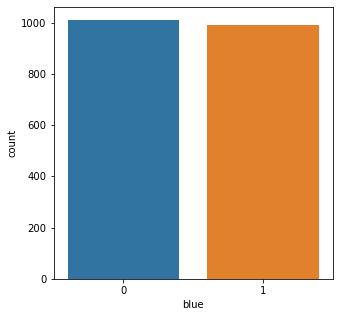

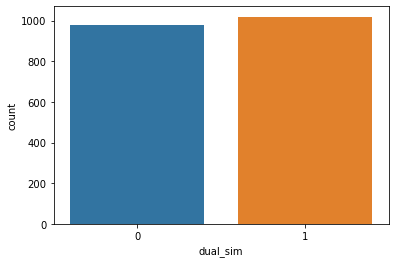

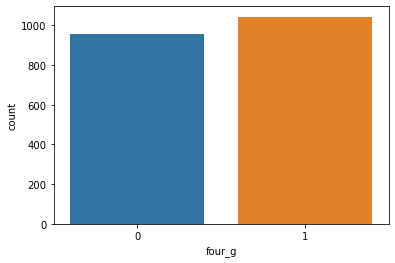

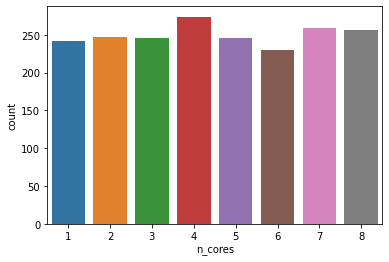

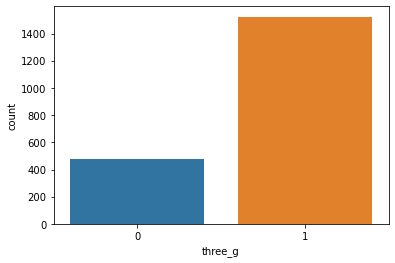

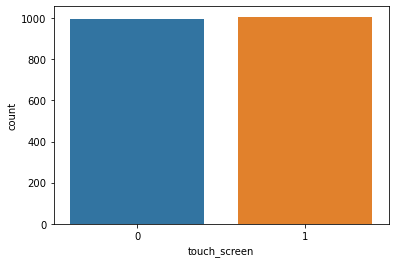

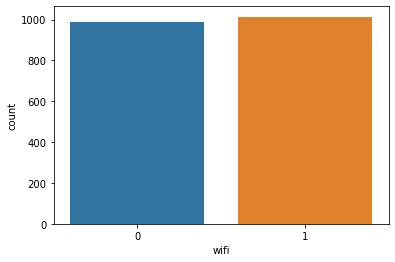

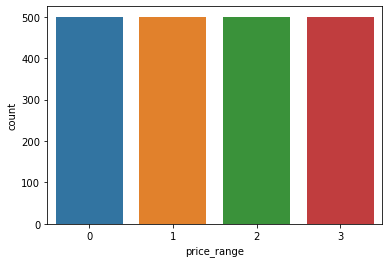

In [18]:
#count plot for less than 10 unique values

plt.figure(figsize=(5,5))

for i in data:
    if (data[i].nunique())<10:
        sns.countplot(x=data[i])
        plt.show()

In [19]:
# columns that have unique value above 10 and below 30
data3 =data.drop(["battery_power","blue","dual_sim","four_g","int_memory","mobile_wt","n_cores","px_height",
                  "px_width","ram","three_g","touch_screen","wifi","price_range"],axis=1)
print(data3.shape)

(2000, 7)


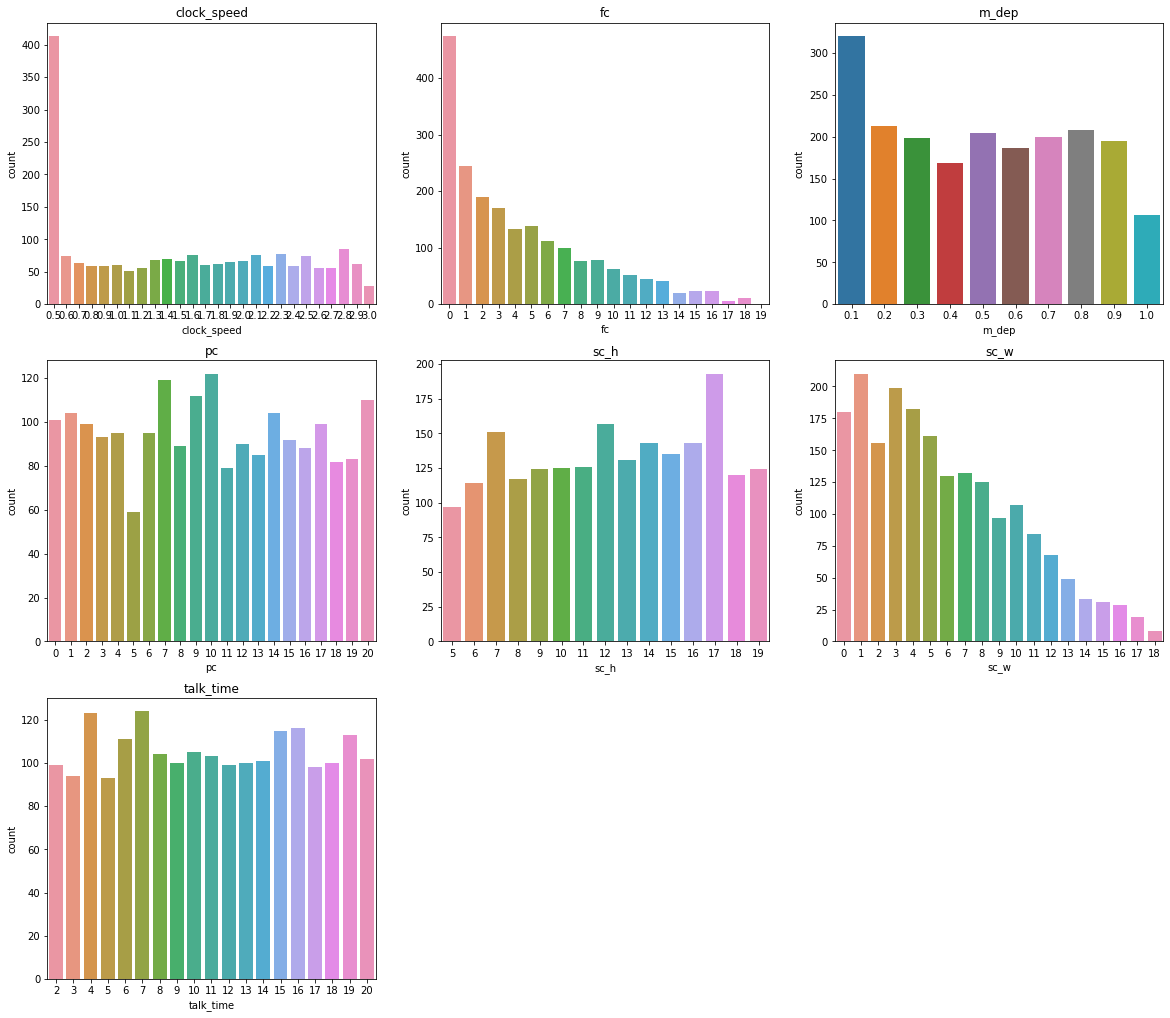

In [20]:
#count plot
column_name=data3.columns
col=len(column_name)
j=1
plt.figure(figsize=(20,30))
for i in range(0,col):
  plt.subplot(5,3,j)
  sns.countplot(x=data3[column_name[i]])
  plt.title(column_name[i])
  j=j+1
plt.show()

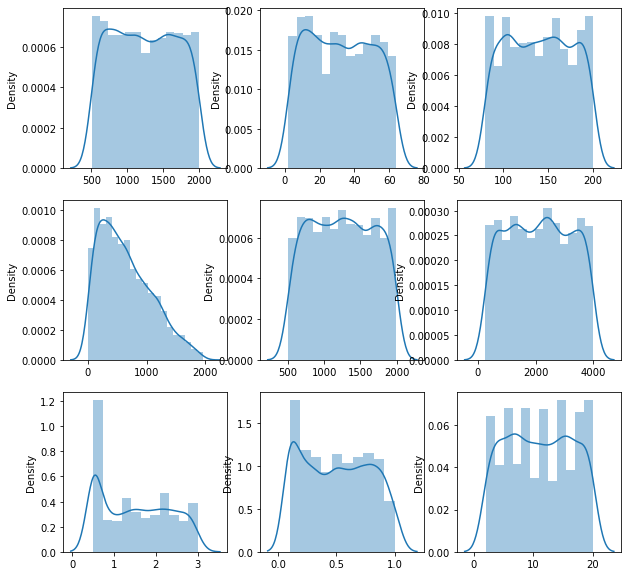

In [21]:
#Distplot for various columns(continous variables in the dataset)

data4= data[["battery_power","int_memory","mobile_wt","px_height","px_width","ram","clock_speed","m_dep","talk_time"]]

column_name=data4.columns
col=len(column_name)

j=1
plt.figure(figsize=(10,10))

for i in range(0,col):
  plt.subplot(3,3,j)
  sns.distplot(x=data4[column_name[i]],kde=True)
  j=j+1
  
plt.show()


In [22]:
df = data
#df.head()

In [23]:
#import plotly.offline as pyo
import plotly.express as px

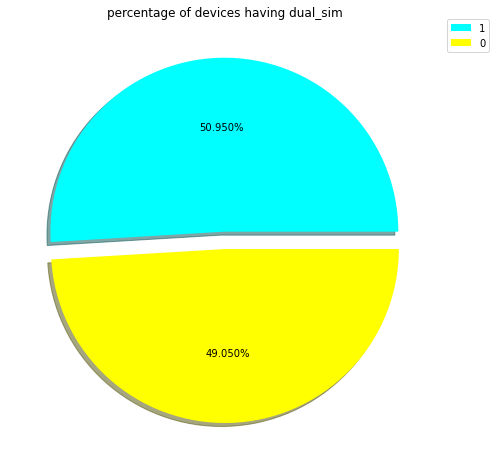

In [49]:
#Pie charts on various columns of the dataset


#pie chart of phones having dual_sim facility

df1 = df["dual_sim"].value_counts()
ax = df1.plot(kind="pie",figsize=(8, 8), autopct='%1.3f%%', shadow=True, explode=[0.05, 0.05], colors=['cyan','yellow'], legend=True, title='percentage of devices having dual_sim', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

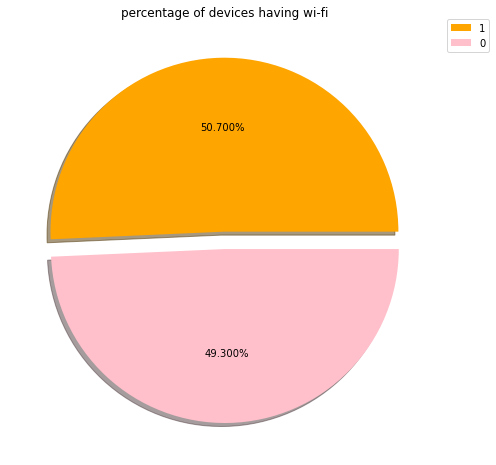

In [48]:
#pie chart of devices having wifi facility
df2 = df["wifi"].value_counts()
ax = df2.plot(kind="pie",figsize=(8, 8), autopct='%1.3f%%', shadow=True, explode=[0.05, 0.05], colors= ['orange', 'pink'], legend=True, title='percentage of devices having wi-fi', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [55]:
#pie chart of devices having bluetooth facility
df["isBluetooth"]=''
for i in range(len(df)):
    if df["blue"][i]==0:
        df["isBluetooth"][i]="No"
    else:
        df["isBluetooth"][i]="Yes"
px.pie(data_frame=df, names="isBluetooth", 
       title="Percentage of devices having bluetooth")


In [56]:
#pie chart of devices having 4G facility
df["is_4G"]=''
for i in range(len(df)):
    if df["four_g"][i]==0:
        df["is_4G"][i]="No"
    else:
        df["is_4G"][i]="Yes"
px.pie(data_frame=df, names="is_4G", title="Percentage of devices having 4G",color_discrete_sequence=px.colors.sequential.RdBu, hole=0.1)

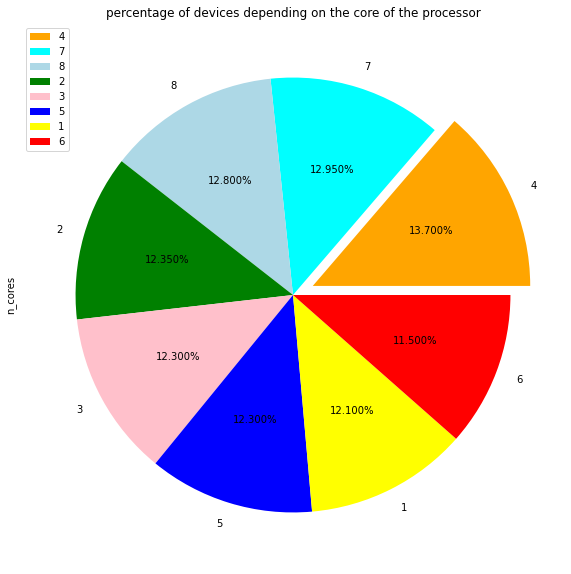

In [76]:
#pie chart of devices depending on the cores
colors = ( "orange", "cyan", "lightblue", "green","pink","blue","yellow","red")
explode = (0.1, 0, 0,0,0,0,0,0)
df['n_cores'].value_counts().plot(kind='pie',y='n_cores',figsize=(10, 10), autopct='%1.3f%%',legend=True,explode=explode,title="percentage of devices depending on the core of the processor", colors = colors)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper right')
plt.show()

In [70]:
#pie chart of devices having three g facility
df["is_3G"]=''
for i in range(len(df)):
    if df["three_g"][i]==0:
        df["is_3G"][i]="No"
    else:
        df["is_3G"][i]="Yes"
px.pie(data_frame=df, names="is_3G", title="Percentage of devices having 3G",color_discrete_sequence=px.colors.sequential.RdBu, hole=0.2)


In [71]:
#pie chart of devices having touch screen facility

df["touch_screen"]=''
for i in range(len(df)):
    if df["touch_screen"][i]==0:
        df["touch_screen"][i]="No"
    else:
        df["touch_screen"][i]="Yes"
px.pie(data_frame=df, names="touch_screen", 
       title="Percentage of devices having touch_screen",hole=.3)

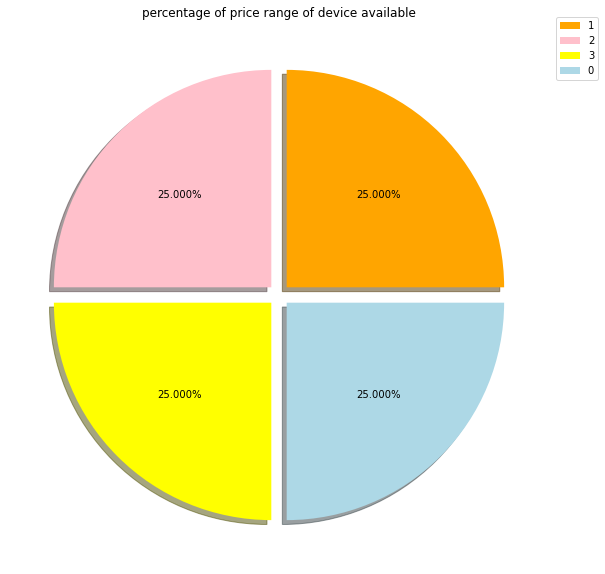

In [75]:
#pie chart of devices depending on the price range

df3 = df["price_range"].value_counts()
ax = df3.plot(kind="pie",figsize=(10, 10), autopct='%1.3f%%', shadow=True, explode=[0.05, 0.05,.05,.05], colors= ['orange', 'pink','yellow','lightblue'], legend=True, title='percentage of price range of device available', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

2. Bivariant analysis

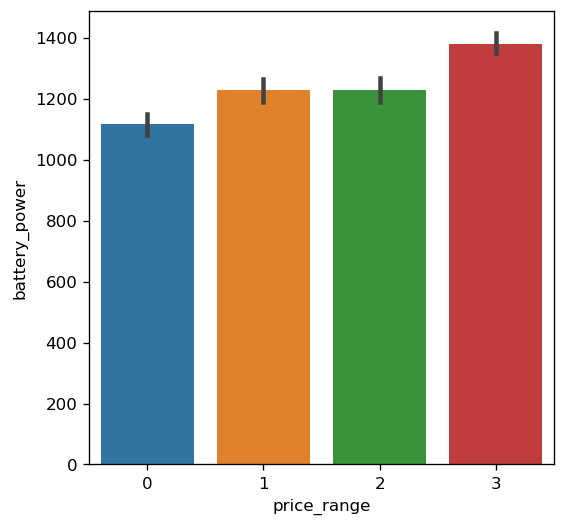

In [77]:
plt.figure(figsize=(5,5),dpi=120)
sns.barplot(y="battery_power", x="price_range", data=data)
plt.show()

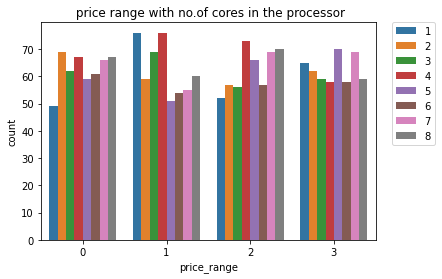

In [78]:
#price dependence on no.of cores

sns.countplot(data=data,x="price_range",hue="n_cores")
plt.title(" price range with no.of cores in the processor")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

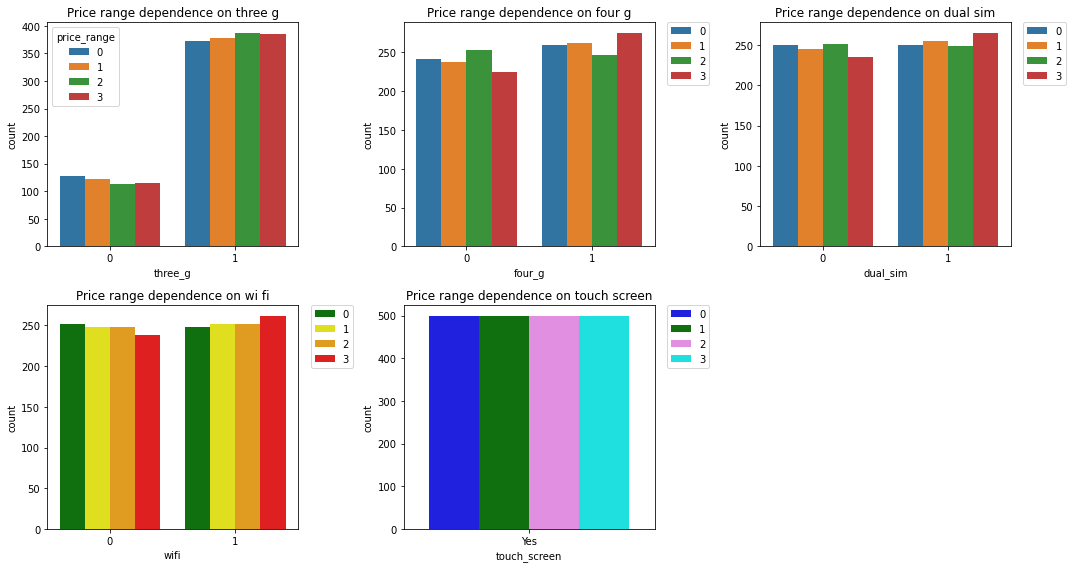

In [86]:
# price range dependence on different features using count plot
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(data=data,x="three_g",hue="price_range")
plt.title("Price range dependence on three g")


plt.subplot(2,3,2)
sns.countplot(data=data,x="four_g",hue="price_range")
plt.title("Price range dependence on four g")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,3,3)
sns.countplot(data=data,x="dual_sim",hue="price_range")
plt.title("Price range dependence on dual sim")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,3,4)
sns.countplot(data=data,x="wifi",hue="price_range",palette=["green","yellow","orange","red"])
plt.title("Price range dependence on wi fi")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.subplot(2,3,5)
sns.countplot(data=data,x="touch_screen",hue="price_range",palette=["blue","green","violet","cyan"])
plt.title("Price range dependence on touch screen")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

In [93]:
#Histogram using plotly.express library on various columns

px.histogram(data_frame=df, x="isBluetooth",color="price_range",
             title="Comparison of price range with bluetooth devices or not")

<AxesSubplot:xlabel='sc_h', ylabel='sc_w'>

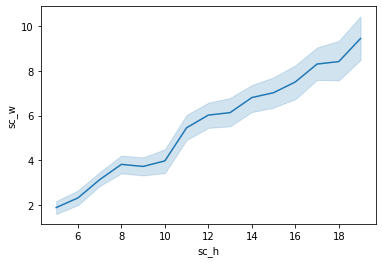

In [94]:
#dependence of screen height and width

sns.lineplot(x="sc_h",y="sc_w",data=data)


<AxesSubplot:xlabel='pc', ylabel='fc'>

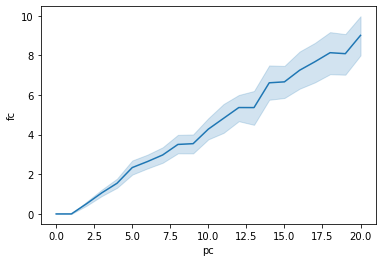

In [95]:
#front camera and primary camera dependence
sns.lineplot(x="pc",y="fc",data=data)

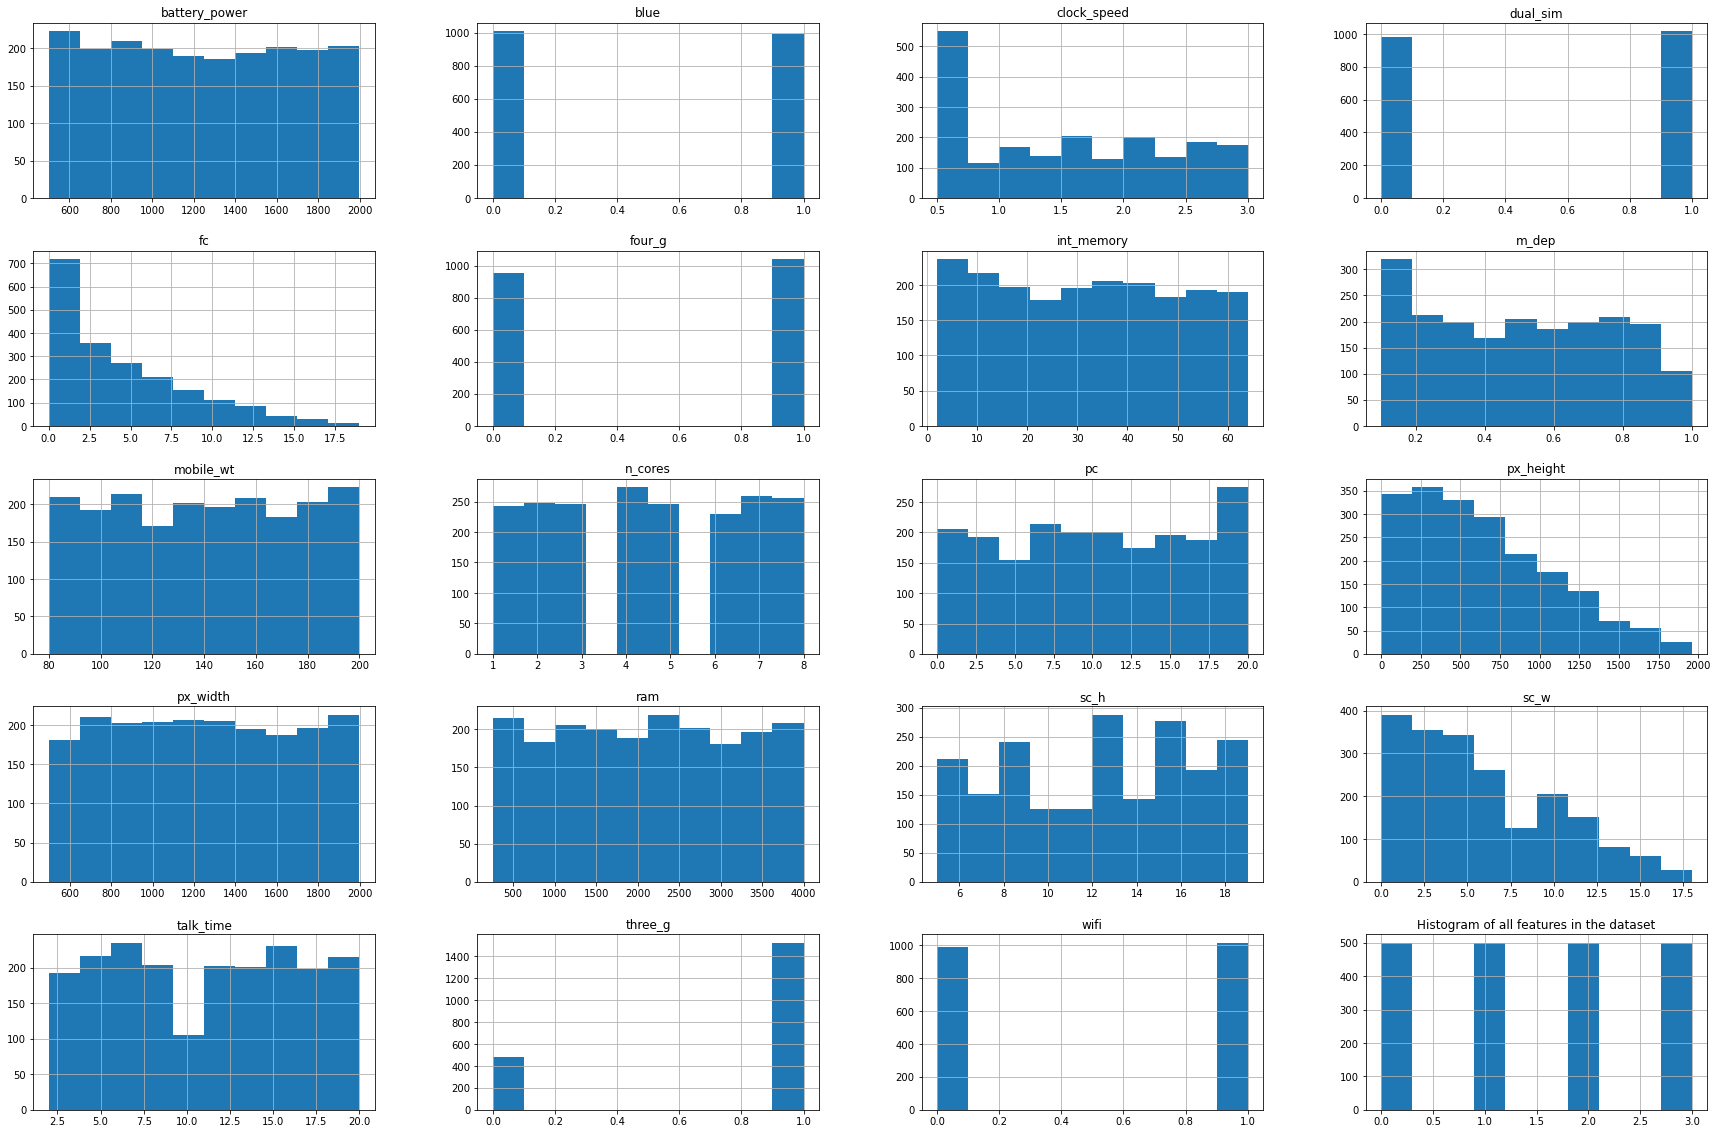

In [97]:
#histogram of the train dataset
data.hist(figsize=(30,20))
plt.title("Histogram of all features in the dataset")
plt.show()

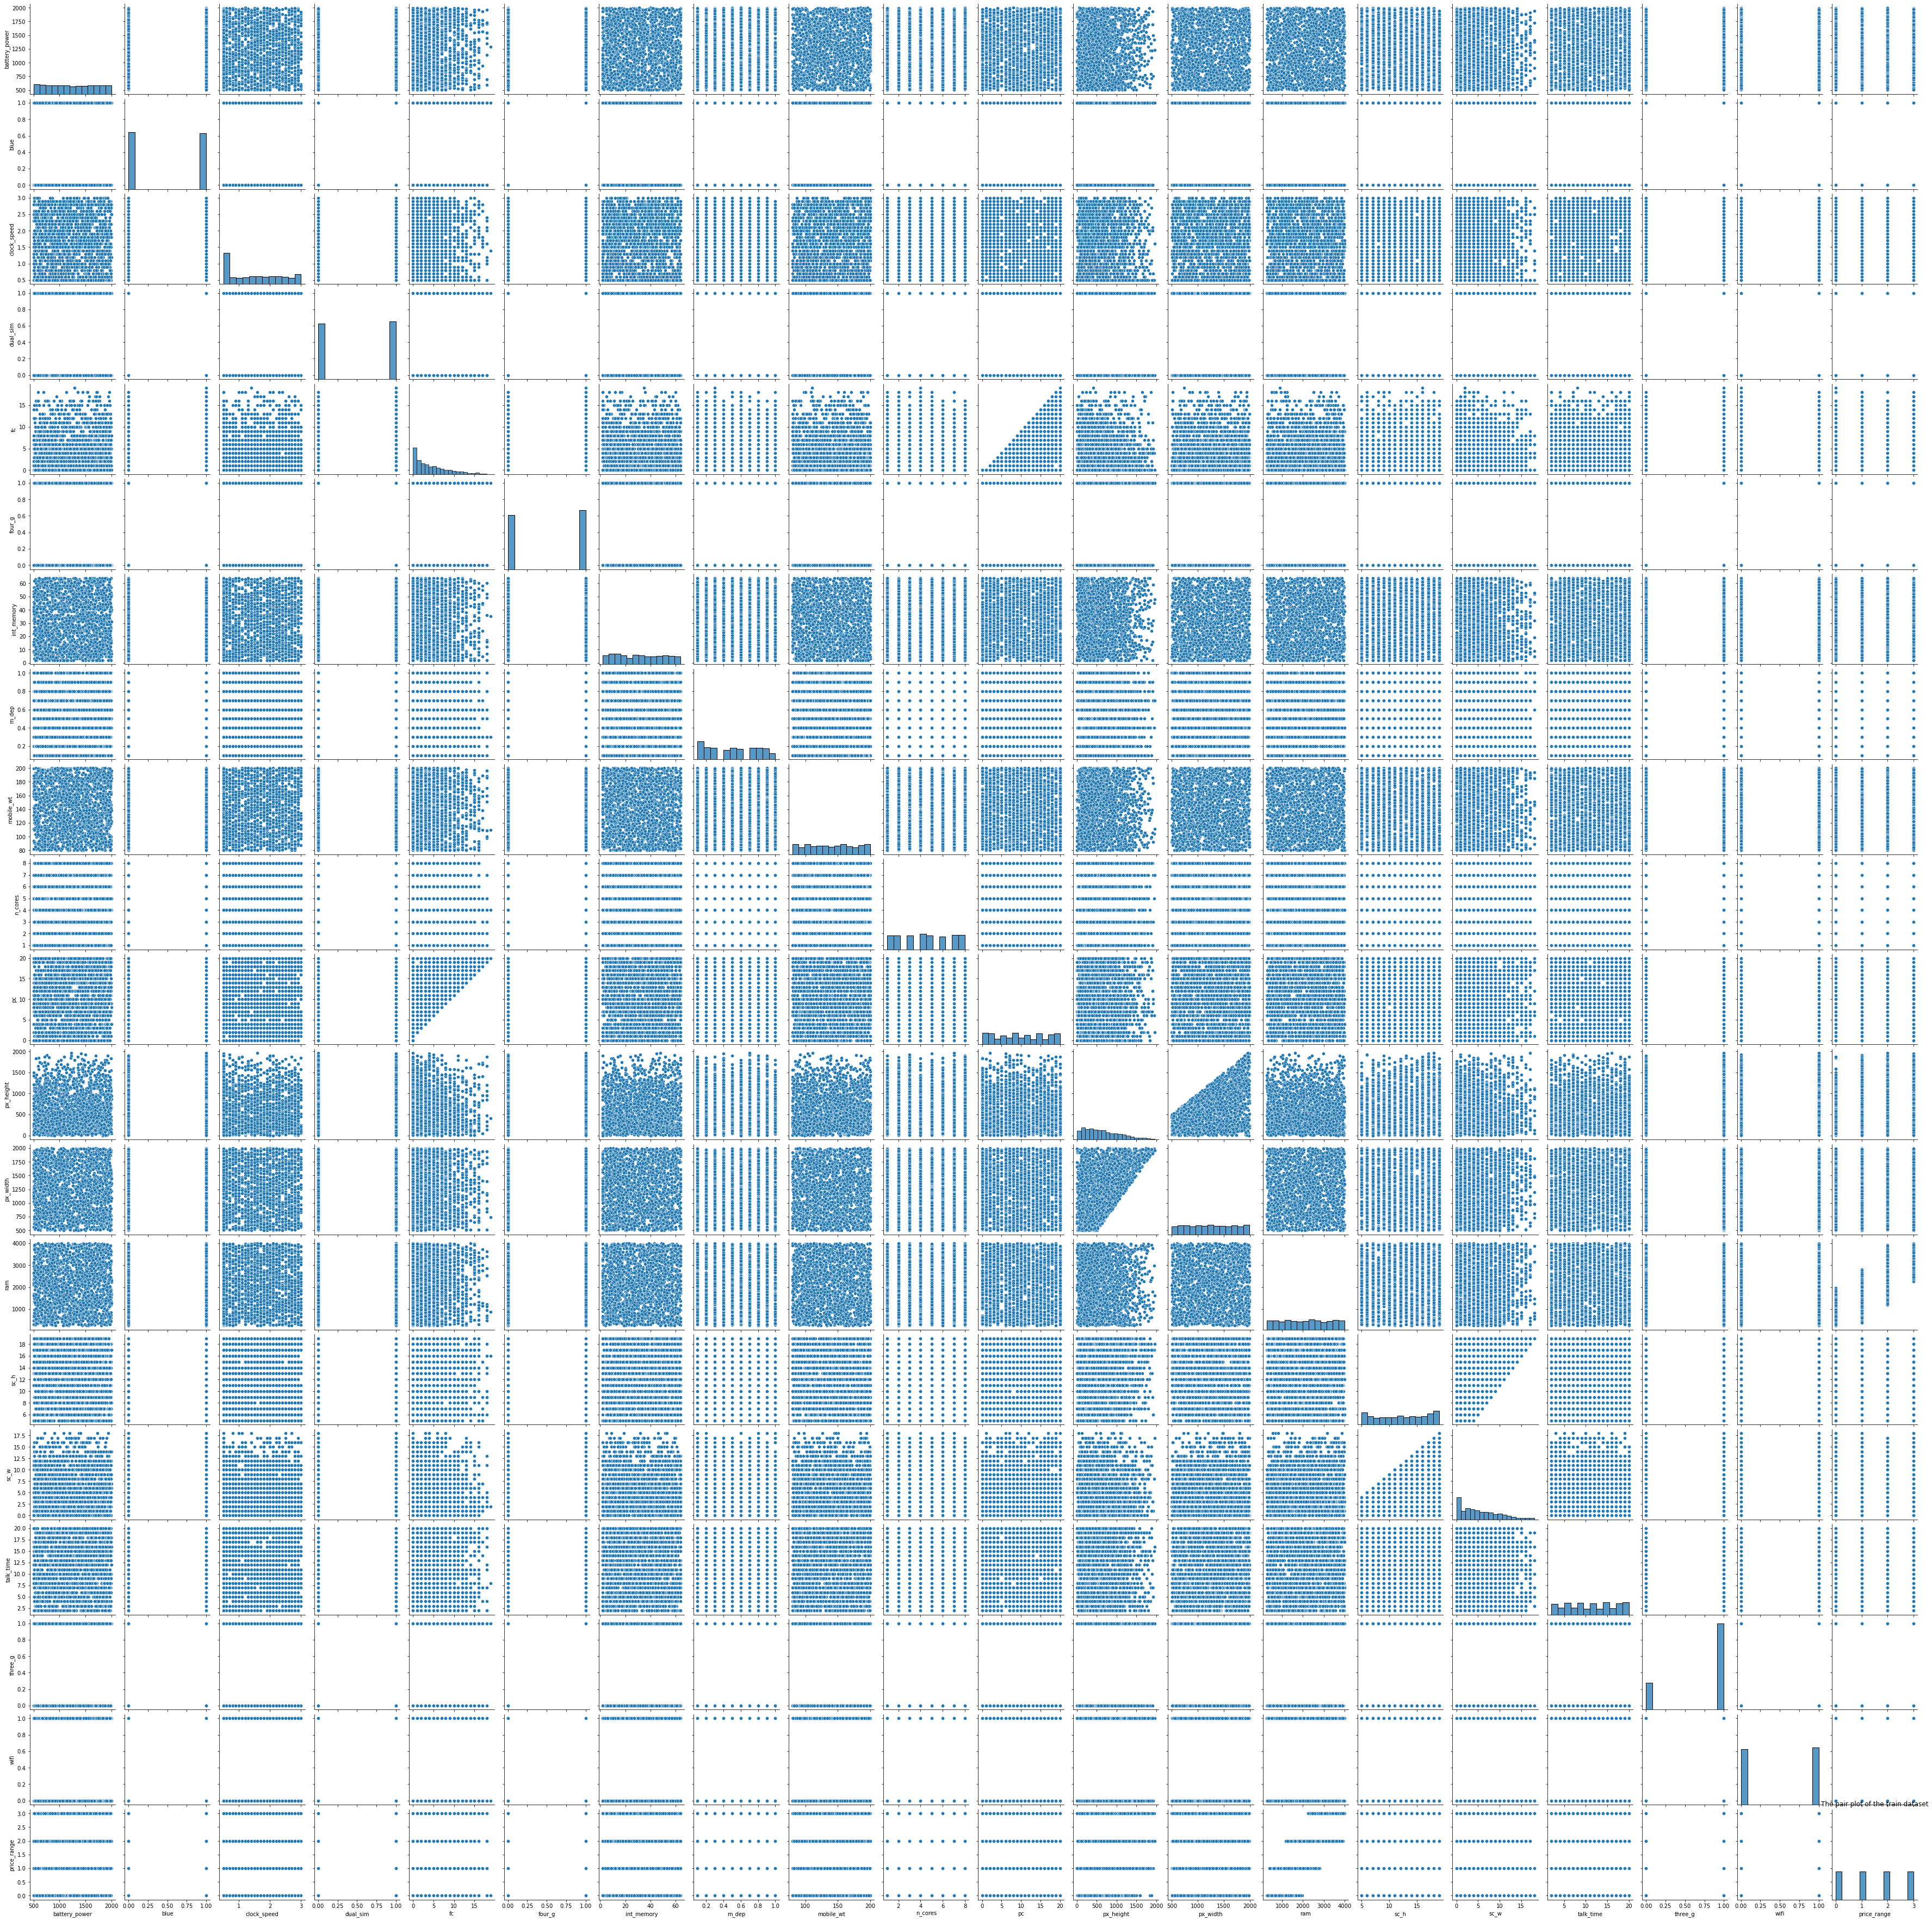

In [96]:
#pairplot
sns.pairplot(data)
plt.title("The pair plot of the train dataset")
plt.show()

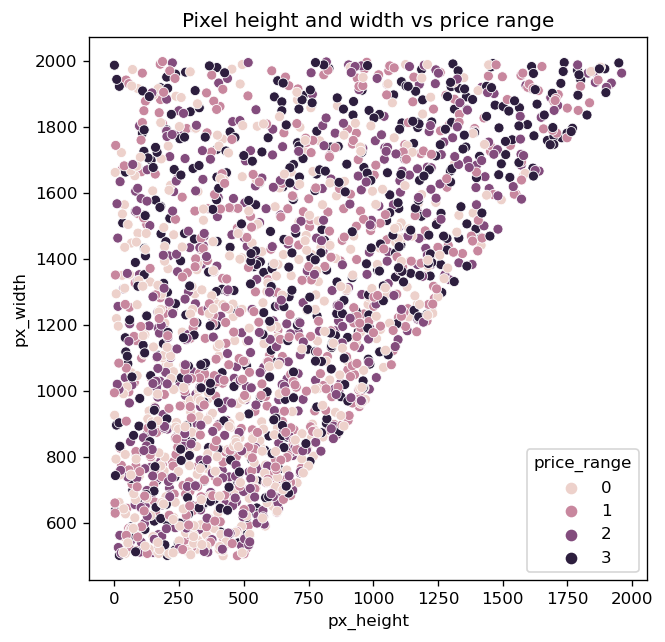

In [99]:
plt.figure(figsize=(6,6),dpi=120)
sns.scatterplot(data['px_height'],data['px_width'],hue=data['price_range'])
plt.title('Pixel height and width vs price range')
plt.show()

It can be seen from the graph that price range is not effected by pixel size. 

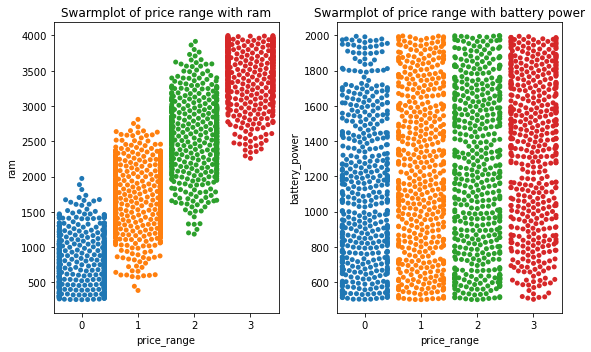

In [98]:
#swarmplot of price range with ram and battery power

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.swarmplot(x = "price_range",y = "ram",data =data)
plt.title("Swarmplot of price range with ram")
plt.subplot(1,2,2)
sns.swarmplot(x = "price_range",y = "battery_power",data =data)
plt.title("Swarmplot of price range with battery power")
plt.tight_layout()
plt.show()

As price range increases,ram feature is also increasing. Battery power and price range have not much dependence.

In [ ]:
#Splitting into hardware and software components

In [100]:
#hardware requests data

data1 = data.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt',
                    'pc','px_height','px_width','ram','talk_time','three_g','sc_h','sc_w','price_range','wifi','touch_screen']]
print("The shape of the dataset is  ",data1.shape)
data1.head()

The shape of the dataset is   (2000, 19)


battery_power  blue  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0            842     0         0   1       0           7    0.6        188   
1           1021     1         1   0       1          53    0.7        136   
2            563     1         1   2       1          41    0.9        145   
3            615     1         0   0       0          10    0.8        131   
4           1821     1         0  13       1          44    0.6        141   

   pc  px_height  px_width   ram  talk_time  three_g  sc_h  sc_w  price_range  \
0   2         20       756  2549         19        0     9     7            1   
1   6        905      1988  2631          7        1    17     3            2   
2   6       1263      1716  2603          9        1    11     2            2   
3   9       1216      1786  2769         11        1    16     8            2   
4  14       1208      1212  1411         15        1     8     2            1   

   wifi touch_screen  
0     1          Yes  
1     0          Yes  
2     0          Yes  
3     0          Yes  
4     0          Yes

In [101]:
#software requests data

data2 = data.loc[:,['n_cores','clock_speed']]
print("The shape of the dataset is  ",data2.shape)
data2.head()


The shape of the dataset is   (2000, 2)


n_cores  clock_speed
0        2          2.2
1        3          0.5
2        5          0.5
3        6          2.5
4        2          1.2

In [ ]:
#Merging Datasets

In [102]:
data3 = pd.concat([data1, data2], axis=1)
data3.head(2)

battery_power  blue  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0            842     0         0   1       0           7    0.6        188   
1           1021     1         1   0       1          53    0.7        136   

   pc  px_height  ...   ram  talk_time  three_g  sc_h  sc_w  price_range  \
0   2         20  ...  2549         19        0     9     7            1   
1   6        905  ...  2631          7        1    17     3            2   

   wifi  touch_screen n_cores  clock_speed  
0     1           Yes       2          2.2  
1     0           Yes       3          0.5  

[2 rows x 21 columns]

In [ ]:
#correlation

Correlation heat map on train data


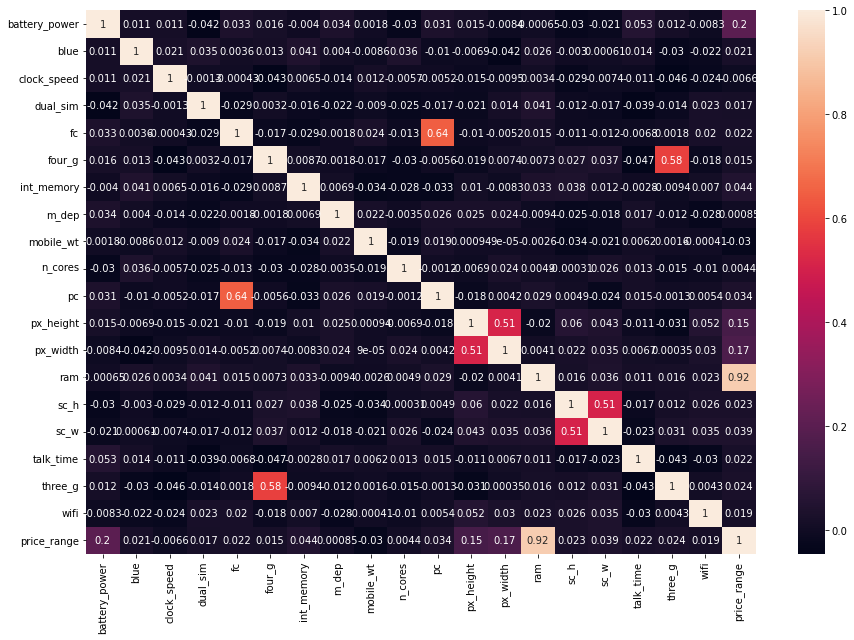

Correlation heat map on test data


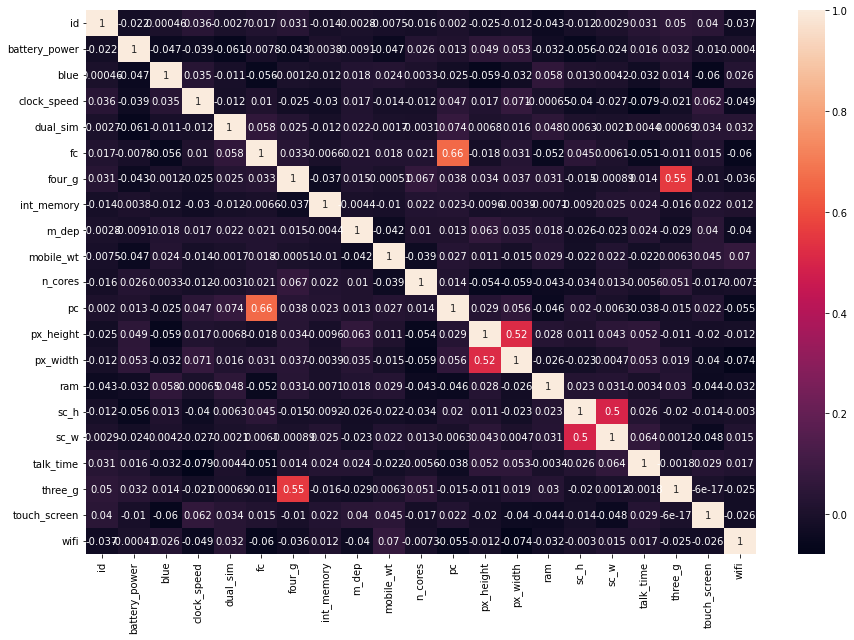

In [106]:
print("Correlation heat map on train data")
data_corr=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data_corr,annot=True)
plt.show()

print("Correlation heat map on test data")
data_corr_test=test.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data_corr_test,annot=True)
plt.show()

From the heat map of train dataset it can be seen that 'price range' and 'ram' have high correlation,which is 0.92.'Price range' is our target variable and it has high dependence on RAM so we cannot delete any of those columns.

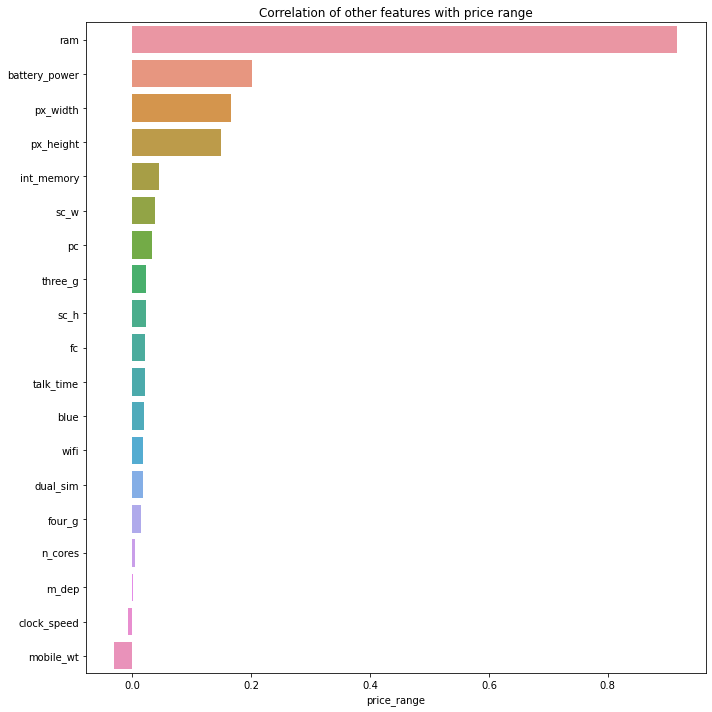

In [112]:
correlation = data_corr['price_range'].sort_values(ascending = False)
corr = correlation[1:]
plt.figure(figsize=(10,10))
sns.barplot(corr,corr.index)
plt.title("Correlation of other features with price range")
plt.tight_layout()
plt.show()

In [ ]:
# Handling Outlier

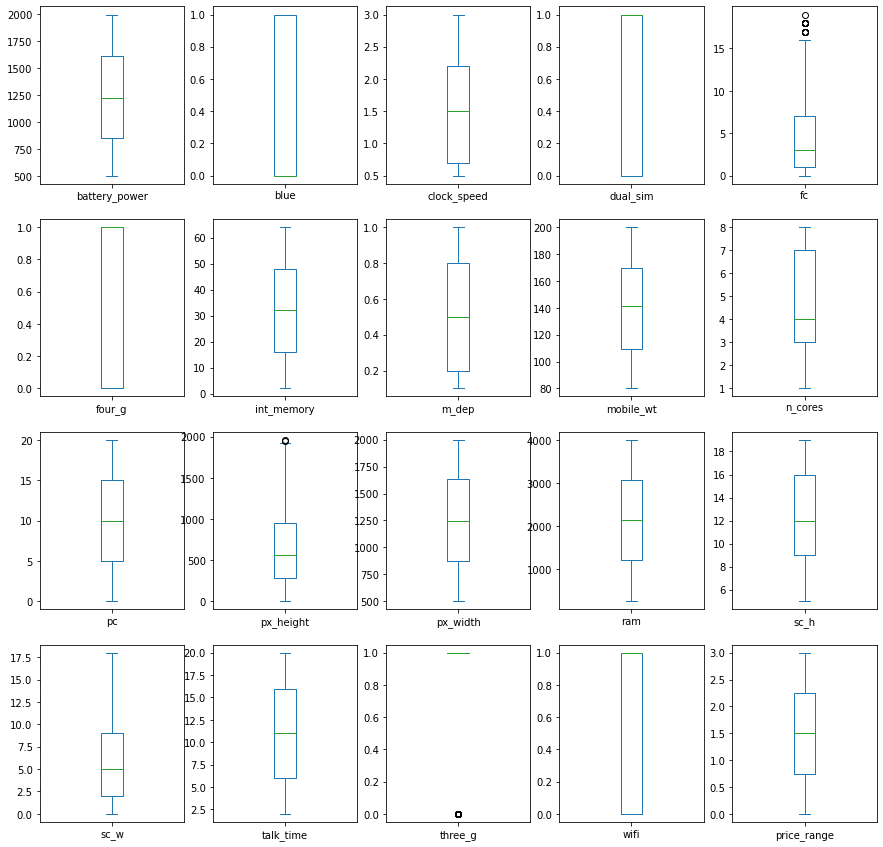

In [114]:
# on train data

data.plot(kind='box', subplots=True, layout=(4,5), figsize=(15,15))
plt.show()

outlier is present only for the column 'fc' so capping those values.


In [115]:
data['fc'].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

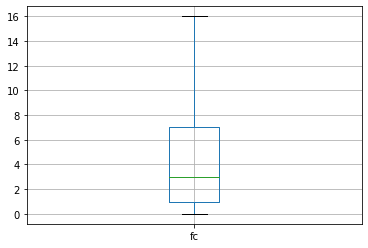

In [117]:
#handling outliers for 'fc'
iqr=data['fc'].quantile(.75)-data['fc'].quantile(.25)
up=data['fc'].quantile(.75) + 1.5*iqr
low=data['fc'].quantile(.25) - 1.5*iqr
outliers=data[(data['fc']<low)|(data['fc']>up)]

#using statistics will cap fc > up to upper limit and fc < low to lower limit
data.loc[data['fc']<low,'fc']=low
data.loc[data['fc']>up,'fc']=up
data[['fc']].boxplot()
plt.show()

no ouliers are left in the dataset